**Project PRCP-1003-Customer Transaction Prediction**

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
#read the csv file
data = pd.read_csv('train(1).csv')

# Display the first few rows of the dataset
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
# Display the last few rows of the dataset
data.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
81238,train_81238,0,14.3936,-0.6856,13.1111,7.1076,12.6713,-5.7871,5.4866,14.0766,...,0.4046,6.1716,1.0808,4.4575,19.5274,3.0890,14.2719,9.0208,16.4241,-9.2701
81239,train_81239,0,4.8156,6.1496,4.8529,9.6194,10.6718,-3.6618,5.8525,14.2554,...,1.9189,10.8145,0.7665,-1.3365,18.5941,1.2245,5.4783,8.4648,21.9719,5.3293
81240,train_81240,0,7.4898,-3.7609,10.6903,6.0188,9.6464,3.9762,5.5262,21.8143,...,2.6208,2.5659,5.3977,10.0782,20.3937,-1.3495,11.0795,9.1098,18.2967,-14.2181
81241,train_81241,0,11.1266,-5.4774,6.2387,3.9911,11.4081,4.3595,5.0205,16.4471,...,-1.3113,5.4995,-1.4556,3.1147,13.2667,-0.0698,5.4471,8.5038,15.8605,-5.5793
81242,train_81242,0,6.9384,0.3639,15.5449,9.8354,10.3564,3.1910,4.6866,14.3236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Describes statistical properties of the dataset
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,81243.000000,81243.000000,81243.000000,81243.000000,81243.000000,81243.000000,81243.000000,81243.000000,81243.000000,81243.000000,...,81242.000000,81242.000000,81242.000000,81242.000000,81242.000000,81242.000000,81242.000000,81242.000000,81242.000000,81242.000000
mean,0.100563,10.676018,-1.650487,10.699792,6.794973,11.084158,-5.086869,5.406105,16.557122,0.280574,...,3.232659,7.448018,1.929036,3.339414,17.998910,-0.139953,2.293982,8.910433,15.873032,-3.355013
std,0.300750,3.042080,4.050486,2.636082,2.046780,1.622497,7.856392,0.864957,3.416721,3.335157,...,4.569851,3.026244,1.475297,3.988309,3.138867,1.428741,5.464512,0.919803,3.011493,10.444050
min,0.000000,0.597900,-14.037000,2.789200,-0.040200,5.615400,-29.013300,2.385700,5.349700,-10.505500,...,-13.180800,-2.343000,-3.814500,-11.783400,8.694400,-5.048100,-14.020400,5.960600,6.299300,-38.852800
25%,0.000000,8.453400,-4.758350,8.712750,5.249600,9.887050,-11.214950,4.767800,13.950100,-2.322450,...,-0.083950,5.167000,0.892100,0.587800,15.623525,-1.163775,-1.990375,8.256200,13.839350,-11.284300
50%,0.000000,10.527400,-1.634600,10.565200,6.826600,11.115600,-4.845000,5.382500,16.475100,0.361500,...,3.206500,7.363600,1.904700,3.398000,17.961200,-0.171550,2.401850,8.889900,15.931850,-2.860850
75%,0.000000,12.753700,1.339050,12.499000,8.331950,12.271350,0.883900,5.998600,19.110250,2.948700,...,6.415250,9.522600,2.950000,6.212775,20.418000,0.825075,6.546150,9.593175,18.060225,4.825050
max,1.000000,20.315000,10.335600,18.652100,12.977300,16.671400,17.251600,8.447700,27.638900,9.519400,...,18.431800,16.684600,7.647600,17.527300,27.928800,4.272900,18.321500,12.000400,26.034600,27.534000


In [5]:
# Lets count the values of the column-target
data['target'].value_counts()

0    73073
1     8170
Name: target, dtype: int64

In [6]:
# Checking for missing values
missing_values=data.isnull().sum().sum()
print(missing_values)

114


In [7]:
# If there are missing values, handle them
if missing_values > 0:
    data.fillna(data.median(), inplace=True)


<ipython-input-7-4aaf51f28f49>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


In [16]:
# Separate features and target variable
X = data.drop(['ID_code', 'target'], axis=1)
y = data['target']

In [17]:
# Normalize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

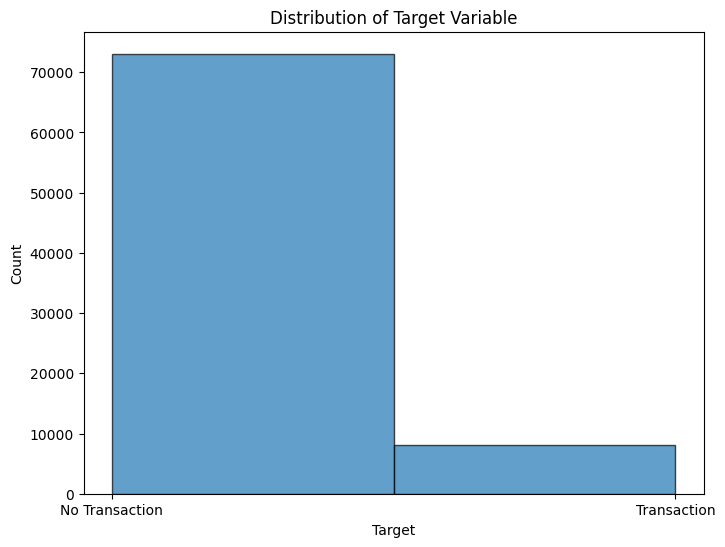

In [18]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
plt.hist(y, bins=2, edgecolor='k', alpha=0.7)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Transaction', 'Transaction'])
plt.show()



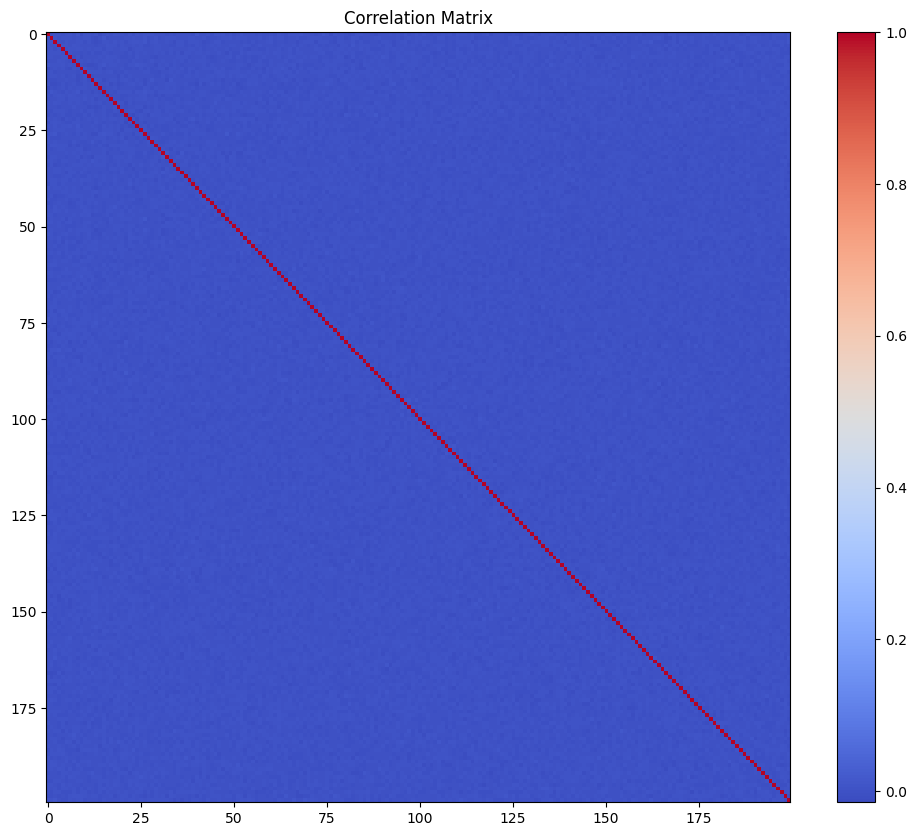

In [19]:
# Visualize the correlation matrix
correlation_matrix = pd.DataFrame(X_scaled).corr()

plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Split the data into training and testing set
# Combine X_train and y_train to perform oversampling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_data = pd.concat([X_train, y_train], axis=1)

# Separate minority and majority classes
minority_class = train_data[train_data['target'] == 1]
majority_class = train_data[train_data['target'] == 0]

# Oversample the minority class
minority_oversampled = minority_class.sample(len(majority_class), replace=True, random_state=42)

# Combine majority class with oversampled minority class
balanced_train_data = pd.concat([majority_class, minority_oversampled])

# Split balanced data into X and y
X_train_balanced = balanced_train_data.drop('target', axis=1)
y_train_balanced = balanced_train_data['target']


In [24]:
#different types of model training 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'SVM': SVC(probability=True)
}

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    return accuracy, precision, recall, f1, roc_auc


In [25]:
# Evaluate all models
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, y_train, X_test, y_test)


/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this be

**Different evaluation matrices for classification**

Accuracy: The overall proportion of correctly classified instances. This metric can be misleading in imbalanced datasets.

Precision: The proportion of true positive predictions among all positive predictions. High precision means fewer false positives.

Recall: The proportion of true positive predictions among all actual positives. High recall means fewer false negatives.

F1 Score: The harmonic mean of precision and recall. It balances both metrics and is useful when you need a balance between precision and recall.

ROC-AUC: The area under the Receiver Operating Characteristic curve. It measures the ability of the model to distinguish between classes. Higher values indicate better performance.



/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


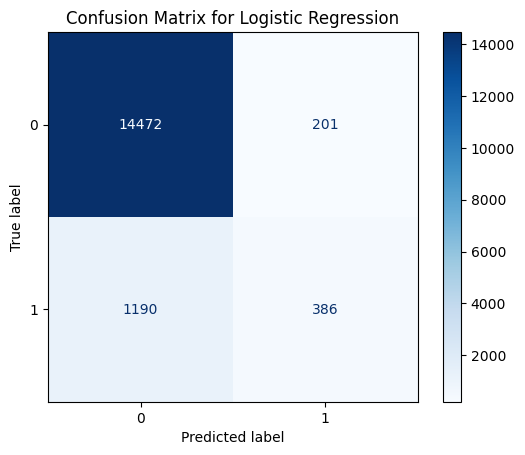

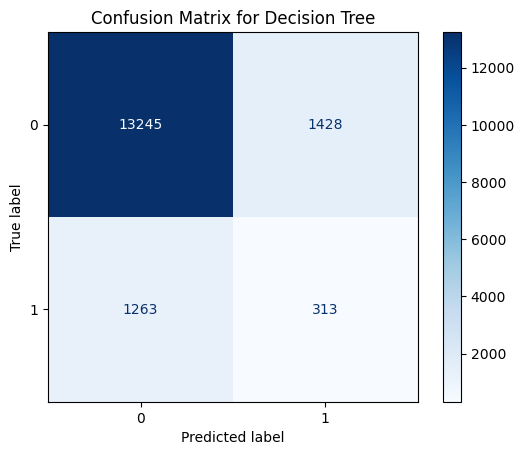

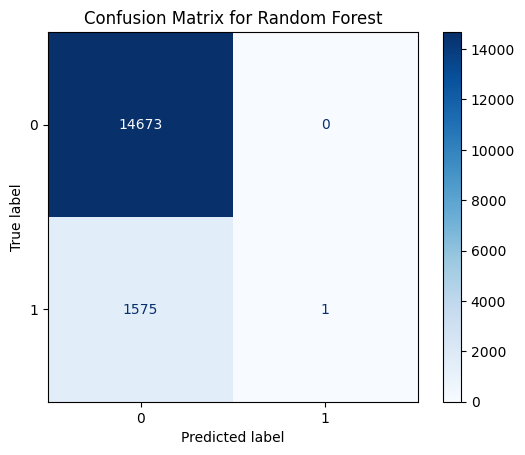

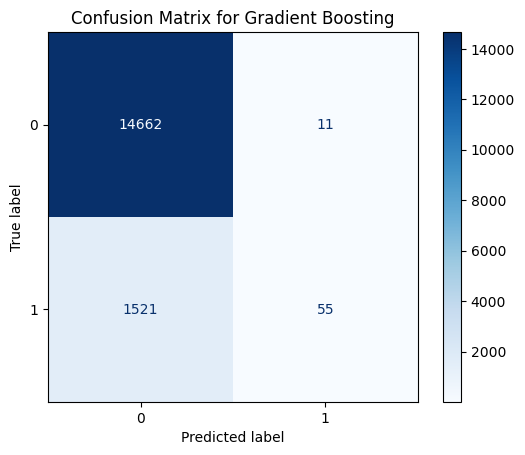

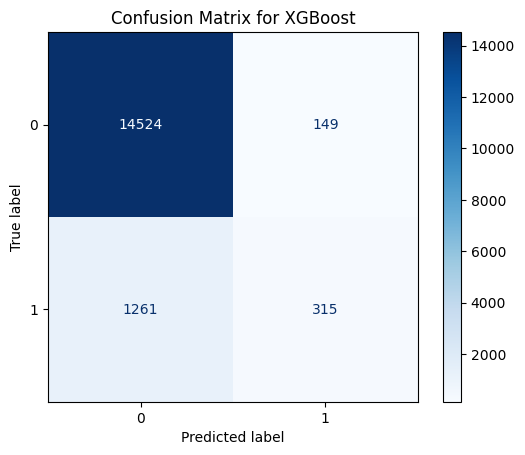

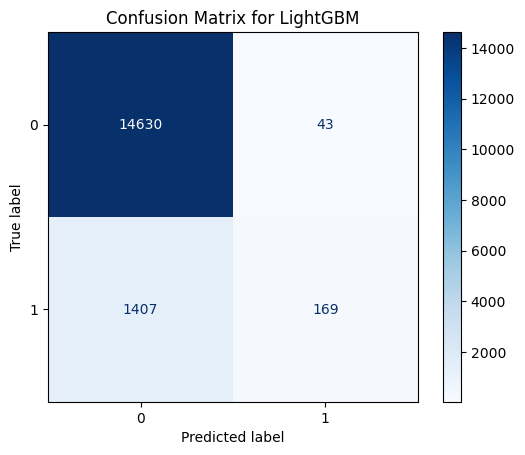

In [ ]:
# Fit the models and generate confusion matrices
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

In [15]:
# Create a DataFrame to display results
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC'])
results_df.T

,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Logistic Regression,0.913900,0.666667,0.255952,0.369892,0.845112
Decision Tree,0.836468,0.169415,0.168155,0.168783,0.538919
Random Forest,0.901264,0.000000,0.000000,0.000000,0.811037
Gradient Boosting,0.904055,0.756757,0.041667,0.078984,0.829410
XGBoost,0.909492,0.750000,0.125000,0.214286,0.831344
LightGBM,0.907141,0.812500,0.077381,0.141304,0.856135
SVM,0.912136,0.842593,0.135417,0.233333,0.867982


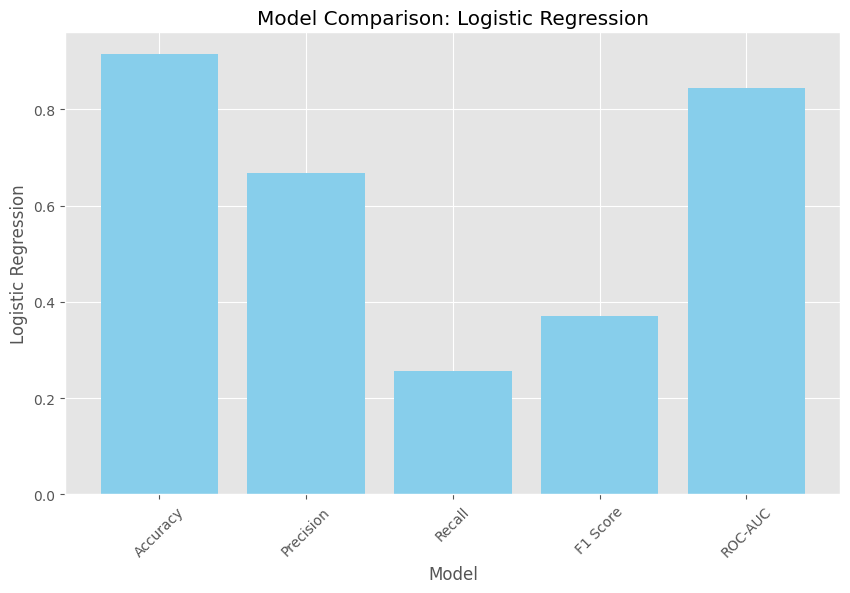

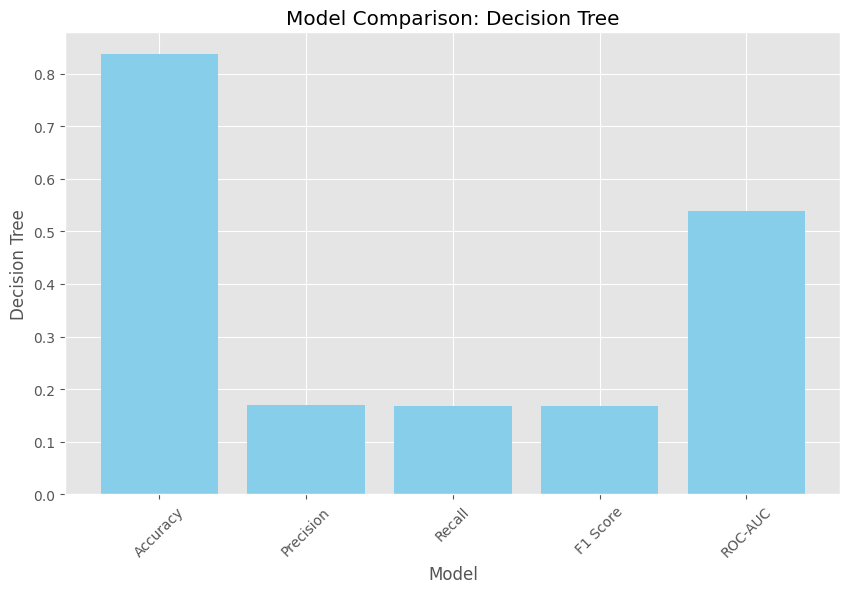

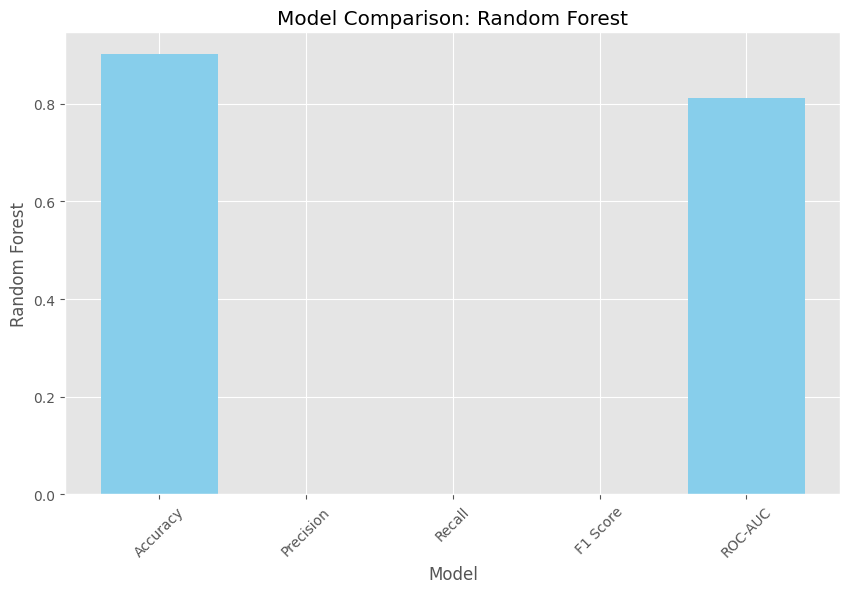

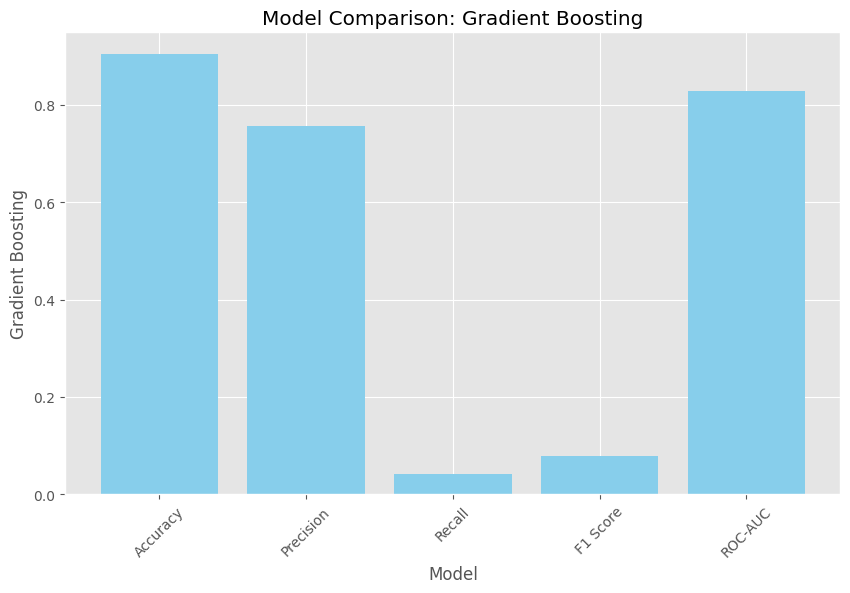

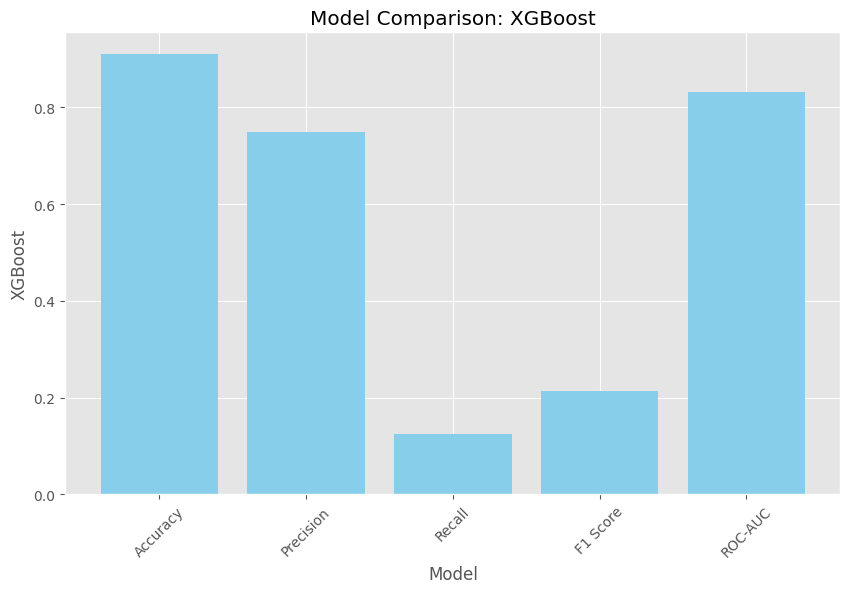

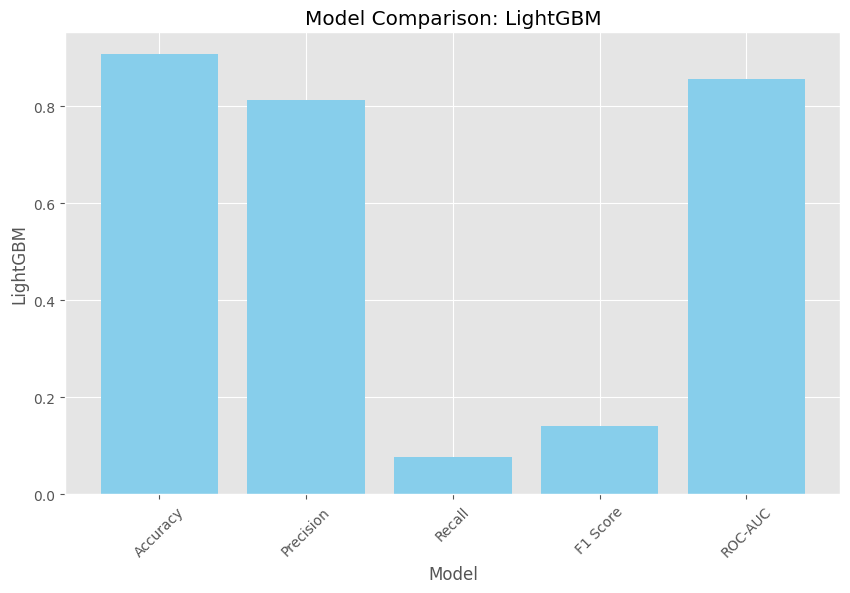

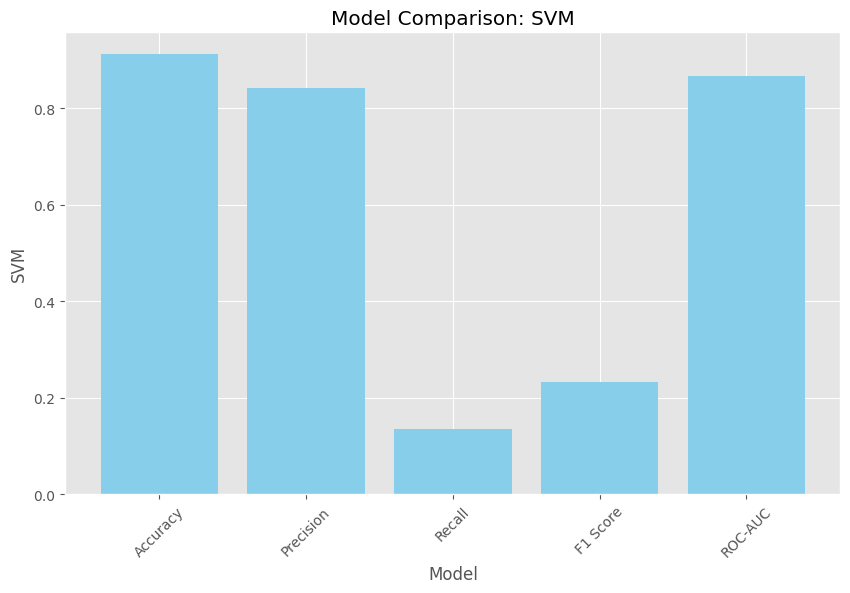

In [16]:
# Visualize the results of different models
plt.style.use('ggplot')

# Plot each metric
for metric in results_df.columns:
    plt.figure(figsize=(10, 6))
    plt.bar(results_df.index, results_df[metric], color='skyblue')
    plt.title(f'Model Comparison: {metric}')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.show()


**Best Performed model: SVM Classifier**

1. SVM for the best overall performance, focusing on ROC-AUC.
2. Logistic Regression or LightGBM if you need a simpler model with relatively good performance.
3. Further hyperparameter tuning and possibly combining models (ensemble methods) could help improve recall while maintaining high    ROC-AUC.

   